In [1]:
import re, csv
import pandas as pd
import nltk
#from matplotlib import pyplot as plt
#from pprint import pprint
from scrape_data import *
from process_text import *
from helper import *

In [2]:
def plot_profile(title, first_n_postings, max_words=200, return_posting=False):
    """
    Loads the corresponding json file, extracts the first_n job postings and plot the wordcloud profile.
    
    Parameters:
        title: the job title such as "data scientist"
        first_n_postings: int, the first n job postings to use for the plot.
    
    Returns:
        nth_posting: the nth job posting as a string. This helps to verify the first_n_postings param used.
    
    """
    # Convert title to full file name then load the data
    file_name = '_'.join(title.split()) + '.json'
    data = load_data(file_name)
    # Get the posting
    if return_posting:
        n_posting = data[str(first_n_postings)]
        return n_posting
    
    text_list = make_text_list(data, first_n_postings)
    cleaned_text = clean_text(text_list)
    
    # Get the stop words to use
    with open('stopwords.csv', 'r', newline='') as f:
        reader = csv.reader(f)
        stop_list = list(reader)[0]
    
    # Join the tokens into a string for plotting
    text = ' '.join(cleaned_text)
    to_file_name = '_'.join(title.split())
    plot_wc(text, max_words, stopwords_list=stop_list, to_file_name=to_file_name)
    
    #return n_posting   

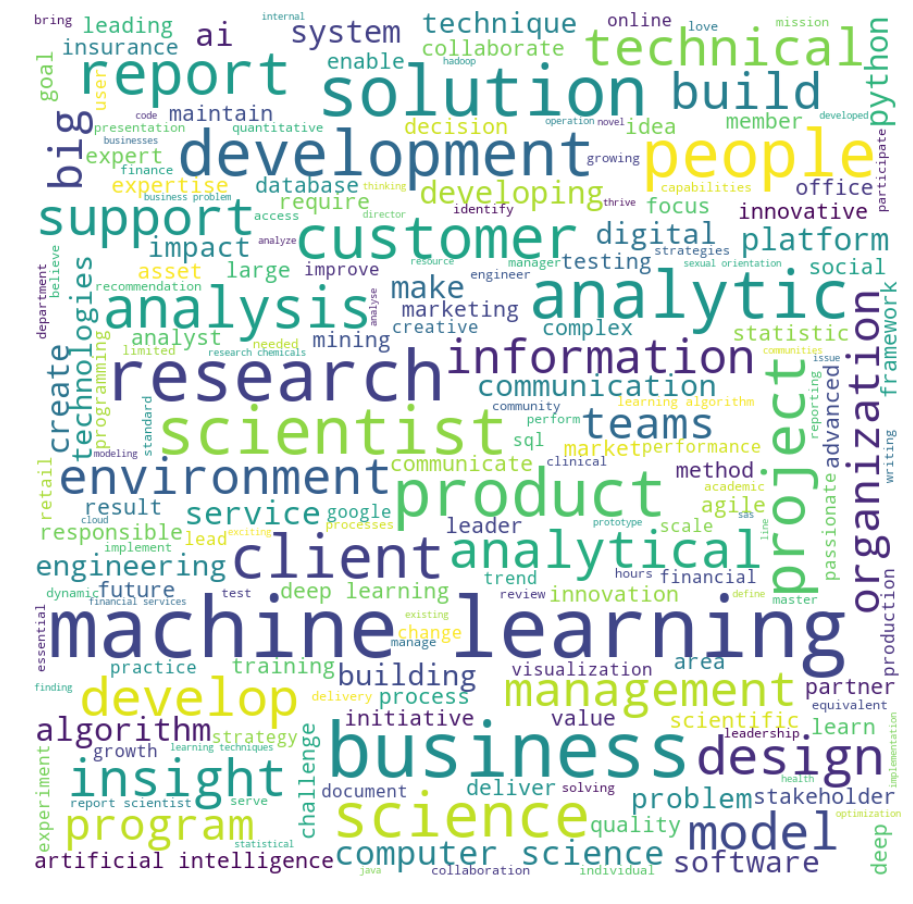

In [3]:
#plot_profile('data scientist', first_n_postings=110, return_posting=True)
plot_profile('data scientist', max_words=200, first_n_postings=110)

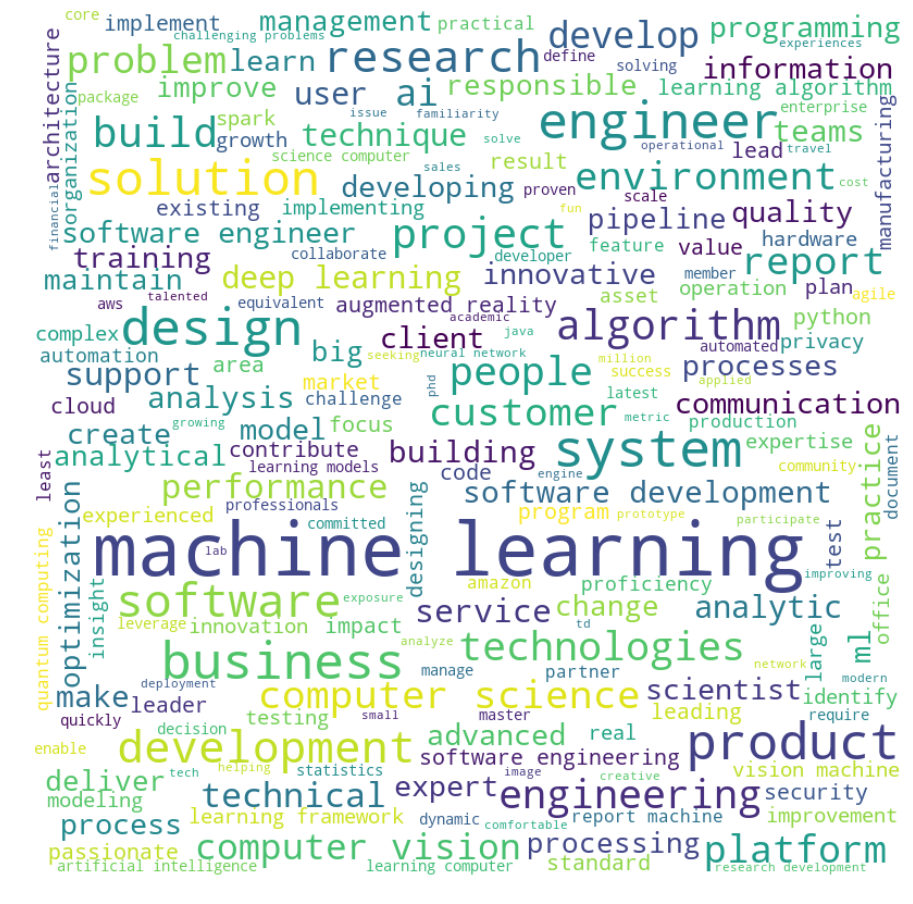

In [4]:
#plot_profile('machine learning engineer', first_n_postings=110, return_posting=True)
plot_profile('machine learning engineer', max_words=200, first_n_postings=110)

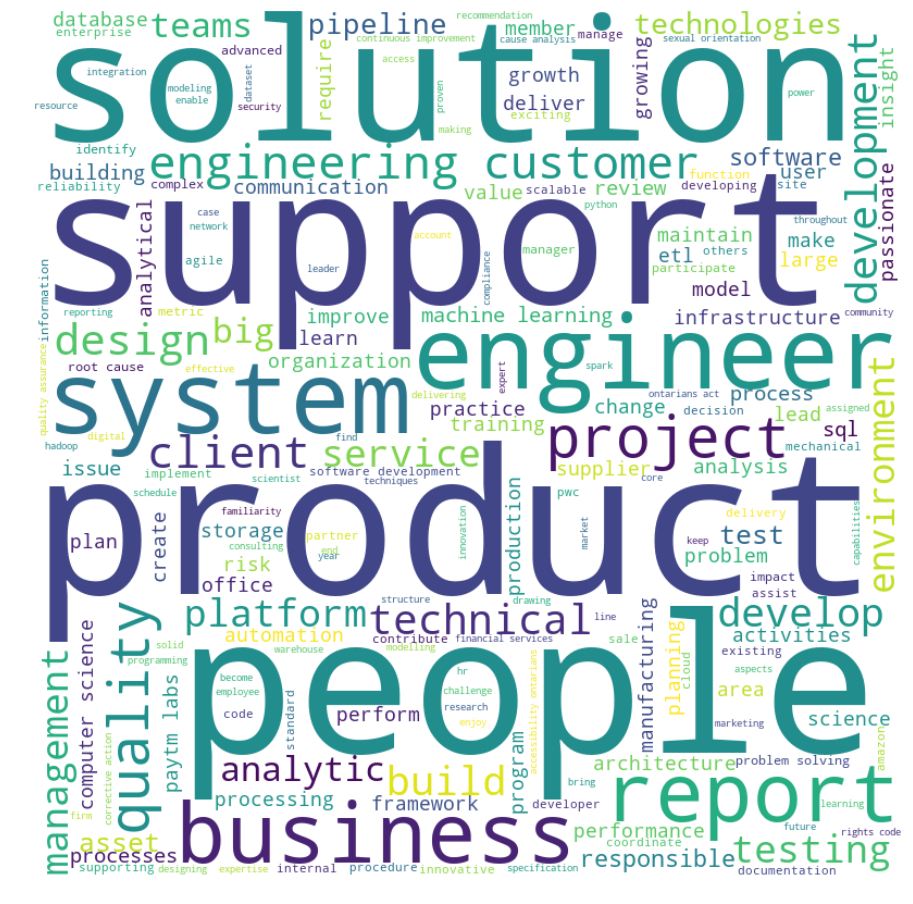

In [5]:
#plot_profile('data engineer', first_n_postings=120, return_posting=True)
plot_profile('data engineer', max_words=200, first_n_postings=120)

In [13]:
with open('stopwords.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    stop_list = list(reader)[0]
stop_list

['experience',
 'job',
 'work',
 'working',
 'skills',
 'new',
 'company',
 'years',
 'technology',
 'ago',
 'save',
 'jobapply',
 'nowapply',
 'using',
 'strong',
 'ability',
 'days',
 'knowledge',
 'opportunity',
 'tools',
 'related',
 'including',
 'original',
 'understanding',
 'us',
 'role',
 'degree',
 'one',
 'requirements',
 'canada',
 'required',
 'toronto',
 'world',
 'provide',
 'industry',
 'help',
 'saying',
 'reviewsread',
 'looking',
 'preferred',
 'sitesave',
 'applicants',
 'applications',
 'part',
 'field',
 'etc',
 'apply',
 'across',
 'position',
 'life',
 'application',
 'employment',
 'best',
 'key',
 'use',
 'well',
 'following',
 'please',
 'like',
 'opportunities',
 'within',
 'nowsave',
 'drive',
 'qualifications',
 'responsibilities',
 'employees',
 'global',
 'must',
 'equal',
 'able',
 'various',
 'join',
 'candidate',
 'high',
 'needs',
 'education',
 'time',
 'meet',
 'need',
 '',
 'status',
 'accommodation',
 'diverse',
 'successful',
 'may',
 'backgroun

In [55]:
# Get the most frequent 300 tokens
freq = nltk.FreqDist(text)
tokens_top_300 = [i[0] for i in freq.most_common(300)]
# Save to a csv file for manual filtering
with open('stopwords_tmp.csv', 'w', newline='') as f:
     wr = csv.writer(f, quoting=csv.QUOTE_ALL)
     wr.writerow(tokens_top_300)

In [86]:
with open('stopwords.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    stop_list = list(reader)[0]
print(stop_list)

['experience', 'job', 'work', 'working', 'skills', 'new', 'company', 'years', 'technology', 'ago', 'save', 'jobapply', 'nowapply', 'using', 'strong', 'ability', 'days', 'knowledge', 'opportunity', 'tools', 'related', 'including', 'original', 'understanding', 'us', 'role', 'degree', 'one', 'requirements', 'canada', 'required', 'toronto', 'world', 'provide', 'industry', 'help', 'saying', 'reviewsread', 'looking', 'preferred', 'sitesave', 'applicants', 'applications', 'part', 'field', 'etc', 'apply', 'across', 'position', 'life', 'application', 'employment', 'best', 'key', 'use', 'well', 'following', 'please', 'like', 'opportunities', 'within', 'nowsave', 'drive', 'qualifications', 'responsibilities', 'employees', 'global', 'must', 'equal', 'able', 'various', 'join', 'candidate', 'high', 'needs', 'education', 'time', 'meet', 'need', '', 'status', 'accommodation', 'diverse', 'successful', 'may', 'background', 'candidates', 'language', 'good', 'excellent', 'career', 'also', 'level', 'employ

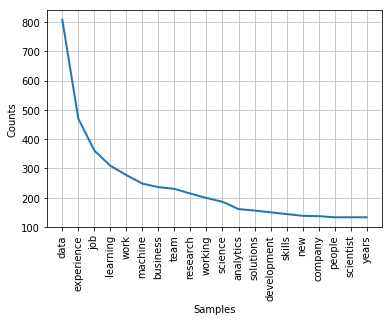

In [73]:
# Print and plot most common words
#[i[0] for i in freq.most_common(300)]
freq.plot(20)

## Todo's
- c++ may be removed
- combine stopword lists
- docstring and comments
- OOP
- add progress update text
- single responsiblity principle for functions